In [49]:
#Stocastic gradient descent on Mnist dataset

In [57]:
'''
Importing Libraries
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [58]:
def load_data():
    '''
    Extracting training and testing data
    '''
    train_data = pd.read_csv(r'L:\Starting Neural Network\MNIST classification\mnist_train.csv', header=None)
    test_data = pd.read_csv(r'L:\Starting Neural Network\MNIST classification\mnist_test.csv', header=None)
    train_data1=np.array(train_data)
    test_data1=np.array(test_data)
    ''' training data '''
    train_image=train_data1[:,1:]
    train_label=train_data1[:,0].reshape(len(train_data1),1)
    ''' testing data '''
    test_image=test_data1[:,1:]
    test_label=test_data1[:,0].reshape(len(test_data1),1)
    ''' HOT-ENCODING training and testing labels'''
    train_label_updated=hot_encode(train_label,10)
    test_label_updated=hot_encode(test_label,10)
    
    ''' Normalizing image pixels '''
    train_image=train_image/255
    ''' returning '''
    return train_image, train_label_updated, test_image, test_label_updated





In [59]:
def hot_encode(label,limit):
    '''
    Function to hot encode the labels in the given limit
    '''
    one_hot_label=np.zeros([len(label),limit])
    j=0
    for i in label:
        one_hot_label[j,i]=1
        j=j+1
    return one_hot_label


In [60]:
class NeuralNetwork():
    
    def __init__(self,train_data):
        # Seed the random number generator
        np.random.seed(1)
        l1_size=np.shape(train_data)[1]
        hidden_l1 = 300
        hidden_l2 = 100
        n_class = 10
        stddev1 = np.sqrt(2/(l1_size+hidden_l1))
        stddev2 = np.sqrt(2/(hidden_l1+hidden_l2))
        stddev3 = np.sqrt(2/(hidden_l2+n_class))
        # Initialize weghts and bases
        self.synaptic_weights1 = np.random.normal(0,stddev1,[l1_size,hidden_l1])
        self.synaptic_weights2 = np.random.normal(0,stddev2,[hidden_l1,hidden_l2])
        self.synaptic_weights3 = np.random.normal(0,stddev3,[hidden_l2,n_class])
        self.bias1 = 1
        self.bias2 = 1
        self.bias3 = 1
        #gradient variables
        self.grad1=0
        self.grad2=0
        self.grad3=0
        self.bias_grad1=0
        self.bias_grad2=0
        self.bias_grad3=0


    def sigmoid(self, x):
        """
        Takes in weighted sum of the inputs and normalizes
        them through between 0 and 1 through a sigmoid function
        """
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_derivative(self, x):
        """
        The derivative of the sigmoid function used to
        calculate necessary weight adjustments
        """
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations, mode="normal"):
        """
        We train the model through trial and error, adjusting the
        synaptic weights each time to get a better result
        """
        #J=[0]*training_iterations
        drop_prob=0.7
        learning_rate=0.01
        for iteration in range(training_iterations):
            # Pass training set through the neural network
            inputs = training_inputs.astype(float).reshape(1,np.shape(train_data)[1])
            a1 = self.sigmoid(np.dot(inputs, self.synaptic_weights1)+self.bias1)
            a2 = self.sigmoid(np.dot(a1, self.synaptic_weights2)+self.bias2)
            a3 = self.sigmoid(np.dot(a2, self.synaptic_weights3)+self.bias3)
            # Multiply error by input and gradient of the sigmoid function
            # Less confident weights are adjusted more through the nature of the function
            if mode=="normal":
                '''This division is for non-convex function's gradient calculation'''
                # Calculate the error rate
                error = (training_outputs - a3)
                J=np.sum(error,axis=0)
                '''weight gradient'''
                self.grad3 = np.matmul(a2.T, error * self.sigmoid_derivative(a3))
                self.grad2 = np.matmul(np.transpose(a1),np.matmul(error * self.sigmoid_derivative(a3),np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2))
                upd=np.matmul(error * self.sigmoid_derivative(a3),np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                self.grad1 = np.matmul(np.transpose(inputs),(self.sigmoid_derivative(a1)*np.matmul(upd,np.transpose(self.synaptic_weights2))))
                '''bias gradient'''
                bias_grad3_tot = error * self.sigmoid_derivative(a3)
                bias_grad2_tot = np.matmul(error * self.sigmoid_derivative(a3),np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                upd1=np.matmul(error * self.sigmoid_derivative(a3),np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                bias_grad1_tot = (self.sigmoid_derivative(a1)*np.matmul(upd,np.transpose(self.synaptic_weights2)))
                self.bias_grad3 = np.mean(bias_grad3_tot,axis=0)
                self.bias_grad2 = np.mean(bias_grad2_tot)
                self.bias_grad1 = np.mean(bias_grad1_tot)
            
            else:
                '''This division is for convex function's gradient calculation'''
                cost = (training_outputs*np.log(a3)) + ((1-training_outputs)*np.log(1-a3))
                J=np.sum(cost,axis=0)
                error=a3-training_outputs
                self.grad3 = np.matmul(a2.T, error)
                self.grad2 = np.matmul(np.transpose(a1),np.matmul(error,np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2))
                upd=np.matmul(error,np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                self.grad1 = np.matmul(np.transpose(inputs),(self.sigmoid_derivative(a1)*np.dot(upd,np.transpose(self.synaptic_weights2))))
                '''bias gradient'''
                bias_grad3_tot = error
                bias_grad2_tot = np.matmul(error ,np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                upd1=np.matmul(error ,np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                bias_grad1_tot = (self.sigmoid_derivative(a1)*np.matmul(upd,np.transpose(self.synaptic_weights2)))
                self.bias_grad3 = np.mean(bias_grad3_tot)
                self.bias_grad2 = np.mean(bias_grad2_tot)
                self.bias_grad1 = np.mean(bias_grad1_tot)
            
            # Adjust synaptic weights
            self.synaptic_weights1 -= self.grad1*learning_rate
            self.synaptic_weights2 -= self.grad2*learning_rate
            self.synaptic_weights3 -= self.grad3*learning_rate
            # Adjust bias
            self.bias1 -= self.bias_grad1*learning_rate
            self.bias2 -= self.bias_grad2*learning_rate
            self.bias3 -= self.bias_grad3*learning_rate
            
        return J

    def think(self, inputs):
        """
        Pass inputs through the neural network to get output
        """
        
        inputs = inputs.astype(float)
        a1 = self.sigmoid(np.dot(inputs, self.synaptic_weights1)+self.bias1)
        a2 = self.sigmoid(np.dot(a1, self.synaptic_weights2)+self.bias2)
        a3 = self.sigmoid(np.dot(a2, self.synaptic_weights3)+self.bias3)
        return (a3)  
    
    def dropout(self, X, drop_probability):
        keep_probability = 1 - drop_probability
        mask = np.random.uniform(0, 1.0, X.shape) < keep_probability
        #############################
        #  Avoid division by 0 when scaling
        #############################
        if keep_probability > 0.0:
            scale = (1/keep_probability)
        else:
            scale = 0.0
        return mask * X * scale



Loss in iteration 0 : 0.09045062636856138
Loss in iteration 1 : 0.04145274174505751
Loss in iteration 2 : 0.03160731663888193
Loss in iteration 3 : 0.025547476960524385
Loss in iteration 4 : 0.0212593161248778
Loss in iteration 5 : 0.018020108707408798
Loss in iteration 6 : 0.015471121178215638
Loss in iteration 7 : 0.01340315062359934
Loss in iteration 8 : 0.011681672748561677
Loss in iteration 9 : 0.010217771803327624
Loss in iteration 10 : 0.008954499795339192
Loss in iteration 11 : 0.007852827178249967
Loss in iteration 12 : 0.0068824162796030505
Loss in iteration 13 : 0.0060221228694104555
Loss in iteration 14 : 0.005258108093038985


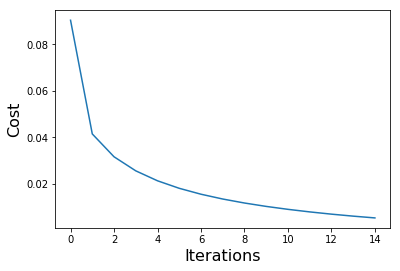

In [55]:
if __name__ == "__main__":
    '''
    Getting data
    '''
    train_data,train_label,test_data,test_label = load_data()
    iterations=15
    #print(train_data)
    hi=NeuralNetwork(train_data)
    cost=[0]*iterations
    for j in range (iterations):
        cost_per_data=0
        for i in range (len(train_data)):
            cost_per_data += hi.train(train_data[i],train_label[i],1,"log")
        cost[j] = abs(np.mean(cost_per_data)/len(train_data))
        print("Loss in iteration",j,":",cost[j])
    plt.plot(cost)
    plt.xlabel('Iterations', fontsize=16)
    plt.ylabel('Cost', fontsize=16)
    plt.show()


In [56]:
var=0
for check_it in range (len(test_image)):
    ypred = np.argmax(hi.think(test_image[check_it]))
    y = np.argmax(test_label_updated[check_it],axis=0)
    if ypred == y:
        var +=1
accuracy = 100*(var/len(test_image))
print("Testing accuracy:",accuracy)



c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


Testing accuracy: 95.91


In [ ]:
'''
The code provided with testing accurac of 94.74% on training using 5 iterations
The code provided with testing accurac of 95.91% on training using 15 iterations
'''